In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web

In [2]:
# Get the stock quote
df=web.DataReader('GOOG',data_source='yahoo',start='2015-01-01',end='2020-01-03')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,531.141724,524.360352,529.795471,524.958740,1368200.0,524.958740
2015-01-02,529.815369,522.665039,527.561584,523.373108,1447500.0,523.373108
2015-01-05,522.894409,511.655243,521.827332,512.463013,2059800.0,512.463013
2015-01-06,514.761719,499.678131,513.589966,500.585632,2899900.0,500.585632
2015-01-07,505.855164,498.281952,505.611847,499.727997,2065000.0,499.727997
...,...,...,...,...,...,...
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,1351.890015
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900.0,1336.140015


In [3]:
df=df.iloc[:,1:2].values
df

array([[ 524.36035156],
       [ 522.66503906],
       [ 511.65524292],
       ...,
       [1334.02001953],
       [1329.08496094],
       [1341.55004883]])

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=sc.fit_transform(df)
df

array([[0.04401351],
       [0.04205688],
       [0.02935002],
       ...,
       [0.97847524],
       [0.97277948],
       [0.98716595]])

In [5]:
# Determine the x_train & y_train 
x_train=df[0:1257]
y_train=df[1:1258]

In [6]:
# Reshape the data using numpy array
x_train=np.reshape(x_train,(1257,1,1))

In [7]:
# Building the RNN with LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [8]:
# Now predicting continous variable & using regression model
regressor=Sequential()
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [9]:
# Now we add output layer to the model
regressor.add(Dense(units=1))

In [10]:
# Compiling the model
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
# Fitting the model with training dataset
regressor.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s 304us/step - loss: 0.0799
Epoch 2/200
1257/1257 [==============================] - 0s 59us/step - loss: 0.0747
Epoch 3/200
1257/1257 [==============================] - 0s 52us/step - loss: 0.0727
Epoch 4/200
1257/1257 [==============================] - 0s 62us/step - loss: 0.0709
Epoch 5/200
1257/1257 [==============================] - 0s 74us/step - loss: 0.0692
Epoch 6/200
1257/1257 [==============================] - 0s 58us/step - loss: 0.0674
Epoch 7/200
1257/1257 [==============================] - 0s 57us/step - loss: 0.0656
Epoch 8/200
1257/1257 [==============================] - 0s 75us/step - loss: 0.0638
Epoch 9/200
1257/1257 [==============================] - 0s 64us/step - loss: 0.0620
Epoch 10/200
1257/1257 [==============================] - 0s 68us/step - loss: 0.0602
Epoch 11/200
1257/1257 [==============================] - 0s 59us/step - loss: 0.0583
Epoch 12/200
1257/1257 [==============================] - 0s 6

1257/1257 [==============================] - 0s 54us/step - loss: 2.5142e-04
Epoch 95/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.4969e-04
Epoch 96/200
1257/1257 [==============================] - 0s 64us/step - loss: 2.5323e-04
Epoch 97/200
1257/1257 [==============================] - 0s 64us/step - loss: 2.5105e-04
Epoch 98/200
1257/1257 [==============================] - 0s 64us/step - loss: 2.5124e-04
Epoch 99/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.4806e-04
Epoch 100/200
1257/1257 [==============================] - 0s 56us/step - loss: 2.5010e-04
Epoch 101/200
1257/1257 [==============================] - 0s 73us/step - loss: 2.5247e-04
Epoch 102/200
1257/1257 [==============================] - 0s 64us/step - loss: 2.4922e-04
Epoch 103/200
1257/1257 [==============================] - 0s 53us/step - loss: 2.4950e-04
Epoch 104/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.4939e-04
Epoch 105/200
1257

1257/1257 [==============================] - 0s 76us/step - loss: 2.4550e-04
Epoch 185/200
1257/1257 [==============================] - 0s 67us/step - loss: 2.4367e-04
Epoch 186/200
1257/1257 [==============================] - 0s 90us/step - loss: 2.4406e-04
Epoch 187/200
1257/1257 [==============================] - 0s 73us/step - loss: 2.4868e-04
Epoch 188/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.4433e-04
Epoch 189/200
1257/1257 [==============================] - 0s 73us/step - loss: 2.4486e-04
Epoch 190/200
1257/1257 [==============================] - 0s 82us/step - loss: 2.4666e-04
Epoch 191/200
1257/1257 [==============================] - 0s 64us/step - loss: 2.4476e-04
Epoch 192/200
1257/1257 [==============================] - 0s 89us/step - loss: 2.4324e-04
Epoch 193/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.4315e-04
Epoch 194/200
1257/1257 [==============================] - 0s 76us/step - loss: 2.4564e-04
Epoch 195/200

In [12]:
# Making predctions & Visualize the data
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

In [13]:
# Using our model to make predictions on the test data
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

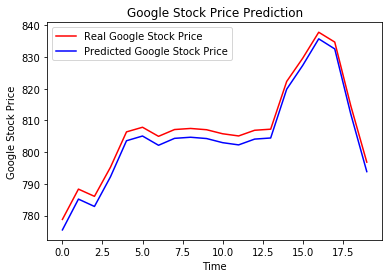

In [14]:
# Now we Visuzlize our results with actual google stock price
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()